In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (9,6)

### Problem 1b) Compare the solution to the analytical solution of the infinite cable

In [3]:
def IC(x,i_e,d_x,a,r_m,r_L):
    if x >= d_x/2:
        i_e = i_e
    elif x <= -d_x/2:
        i_e = i_e
    else:
        i_e = 0
    I_e = i_e*2*np.pi*a*d_x
    lam = np.sqrt((r_m*a)/(2*r_L))
    R_lam = r_m / (2*np.pi*a*lam)
    v1 = (I_e*R_lam/2) * np.exp(-np.abs(x)/lam)
    v2 = np.exp(-np.sqrt(2*r_L/(a*r_m))*abs(x))
    return v1,v2

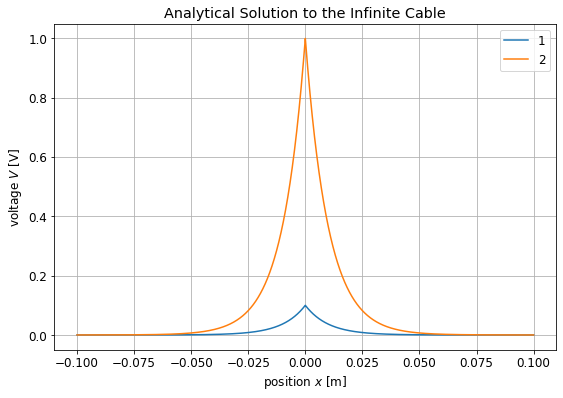

In [4]:
x = np.linspace(-1e-1,1e-1,10000)
solution1 = np.zeros(len(x))
solution2 = np.zeros(len(x))
for i in range(len(x)):
    solution1[i] = IC(x=x[i],i_e=1,d_x=1e-7,a=2e-6,r_m=20e3,r_L=200)[0]
    solution2[i] = IC(x=x[i],i_e=1,d_x=1e-7,a=2e-6,r_m=20e3,r_L=200)[1]
plt.plot(x,solution1,label='1')
plt.plot(x,solution2,label='2')
plt.title('Analytical Solution to the Infinite Cable')
plt.ylabel('voltage $V$ [V]')
plt.xlabel('position $x$ [m]')
plt.legend()
plt.grid()
#plt.savefig('analytical_ic.png')
plt.show()

### Problem 4) Determine the action potential propagation velocity as a function of the axon radius

In [5]:
def APPV(a,c_m,r_m,r_L):
    v = (1/c_m) * np.sqrt((2*a)/(r_m*r_L))
    return v

In [6]:
a = np.linspace(1e-10,1e-5,1e5)
velocity = np.zeros(len(a))
for i in range(len(a)):
    velocity[i] = APPV(a=a[i],c_m=1e-6,r_m=20e3,r_L=200)

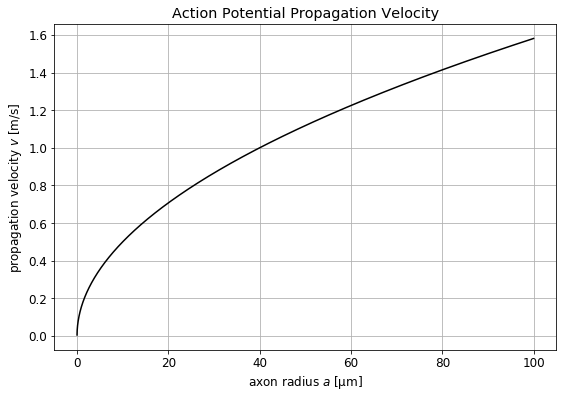

In [13]:
plt.plot(a*10e6,velocity,c='k')
plt.title('Action Potential Propagation Velocity')
plt.ylabel('propagation velocity $v$ [m/s]')
plt.xlabel('axon radius $a$ [µm]')
#plt.xscale('log')
plt.grid()
#plt.savefig('appv.png')
plt.show()

### Myelinated

In [8]:
a = np.linspace(1e-10,1e-5,1e5)
velocity = np.zeros(len(a))
for i in range(len(a)):
    velocity[i] = APPV(a=a[i],c_m=0.2e-7,r_m=1e8,r_L=200)

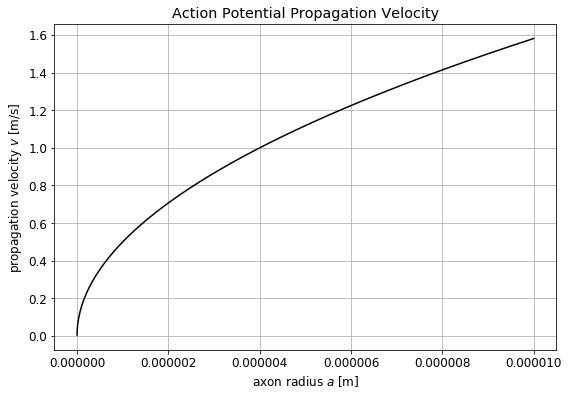

In [9]:
plt.plot(a,velocity,c='k')
plt.title('Action Potential Propagation Velocity')
plt.ylabel('propagation velocity $v$ [m/s]')
plt.xlabel('axon radius $a$ [m]')
#plt.xscale('log')
plt.grid()
#plt.savefig('appv.png')
plt.show()